# Notebook 01 – Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [6]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

DATA_PATH = r"C:/Users/USER/PycharmProjects/ML/data/Telco-Customer-Churn.csv"


## Loads datset

In [7]:
df = pd.read_csv(DATA_PATH)
print("Loaded dataset with shape:", df.shape)
display(df.head())

Loaded dataset with shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial info & summary

In [8]:
print("---- Info ----")
display(df.info())

print("---- Describe (Numeric + Categorical) ----")
display(df.describe(include='all').T)

---- Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

None

---- Describe (Numeric + Categorical) ----


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Fixing Known Issues

In [9]:
# Convert TotalCharges to numeric
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan), errors='coerce')
    missing_total = df['TotalCharges'].isna().sum()
    print(f"Missing TotalCharges: {missing_total}")
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("Missing values per column:")
display(df.isnull().sum())

# Remove customerID for EDA
eda = df.copy()
if 'customerID' in eda.columns:
    eda = eda.drop(columns=['customerID'])

Missing TotalCharges: 11
Missing values per column:


C:\Users\USER\AppData\Local\Temp\ipykernel_22056\3411287169.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Target Variable (Churn) Distribution

Churn counts:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:



Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

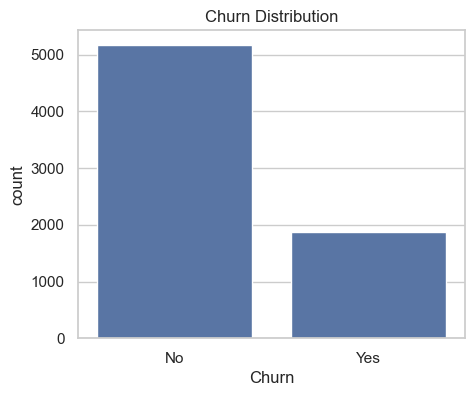

In [10]:
print("Churn counts:\n", df['Churn'].value_counts())
print("\nChurn percentage:\n")
display((df['Churn'].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

## NUMERICAL FEATURE ANALYSIS

In [11]:
# Numeric Columns Summary
numeric_cols = eda.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)
display(eda[numeric_cols].describe().T)

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


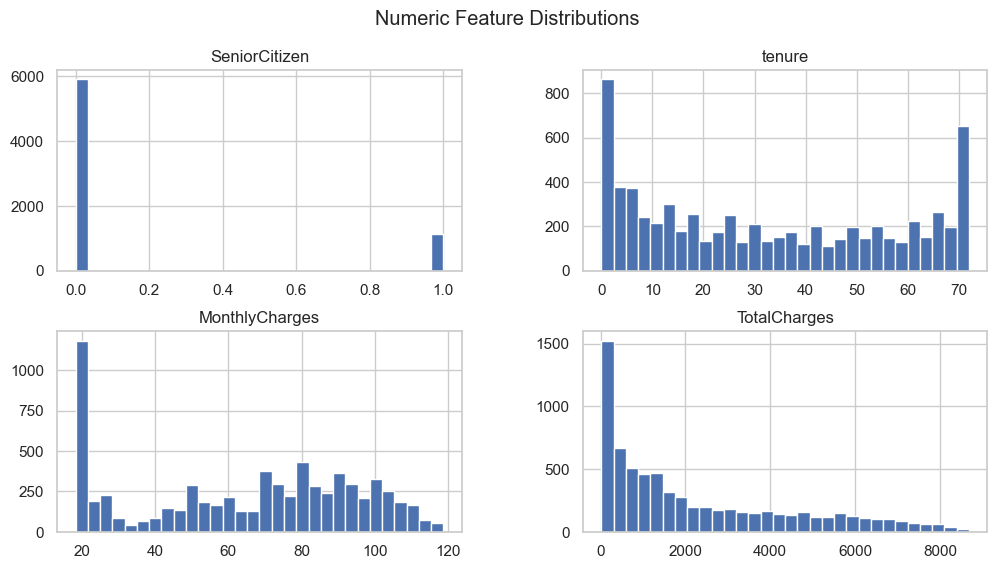

In [12]:
# Histograms for Numeric Features
eda[numeric_cols].hist(bins=30, figsize=(12, 6))
plt.suptitle("Numeric Feature Distributions")
plt.show()

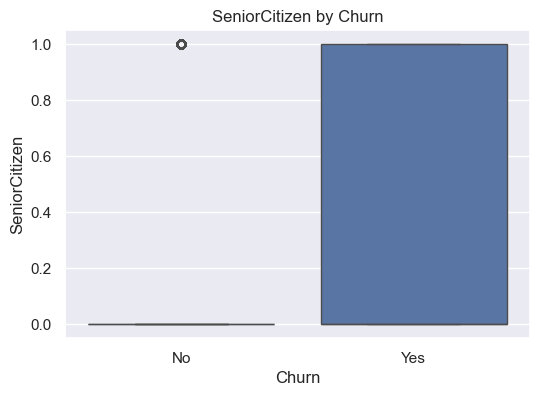

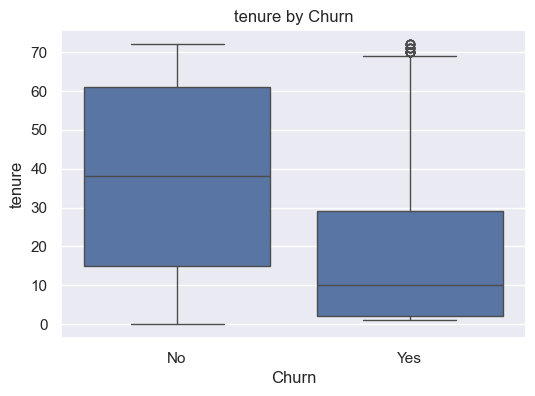

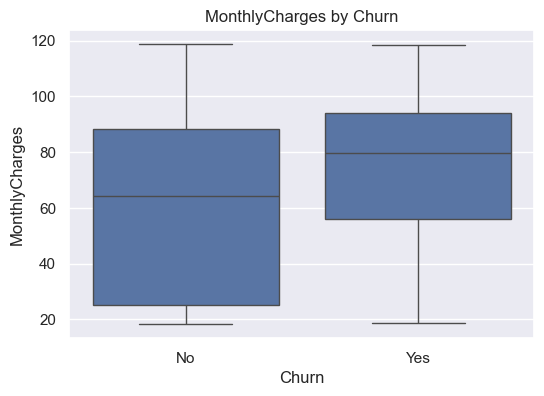

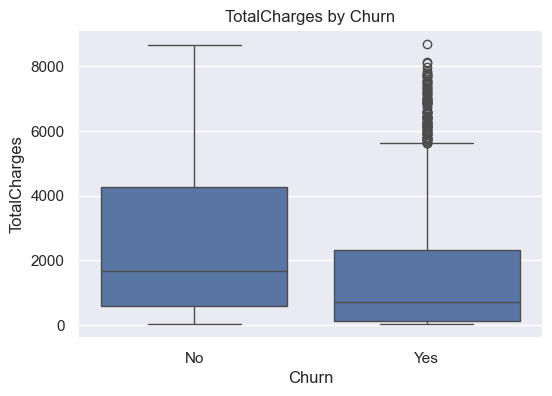

In [13]:
# Boxplots by Churn (Numeric vs Churn)
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=eda)
    plt.title(f"{col} by Churn")
    plt.show()

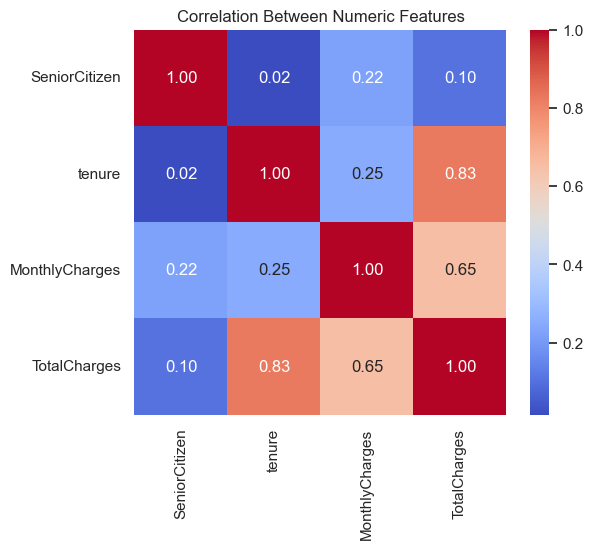

In [14]:
# Correlation Heatmap (Numeric Only)
corr = eda[numeric_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

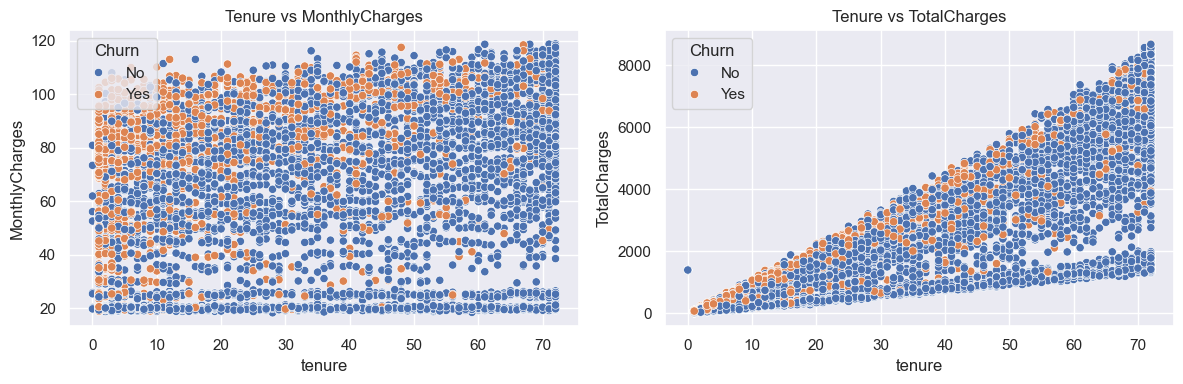

In [15]:
# Pairwise Scatterplots
if {'tenure', 'MonthlyCharges'}.issubset(set(numeric_cols)):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=eda)
    plt.title('Tenure vs MonthlyCharges')

    plt.subplot(1, 2, 2)
    if 'TotalCharges' in eda.columns:
        sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=eda)
        plt.title('Tenure vs TotalCharges')

    plt.tight_layout()
    plt.show()

## CATEGORICAL FEATURE ANALYSIS

In [16]:
# Identify Categorical Columns
categorical_cols = eda.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


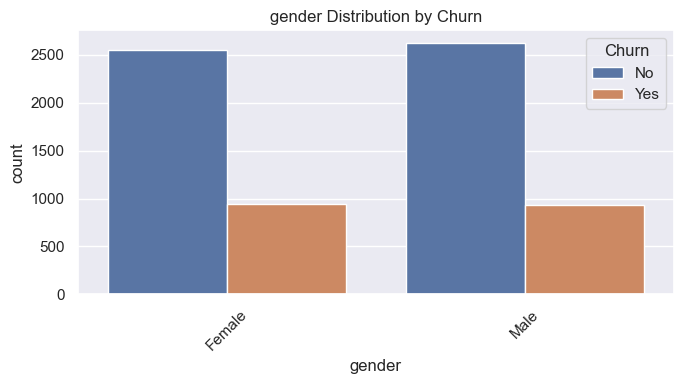

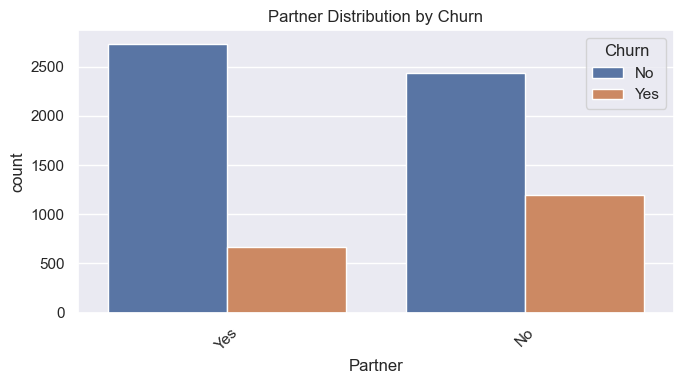

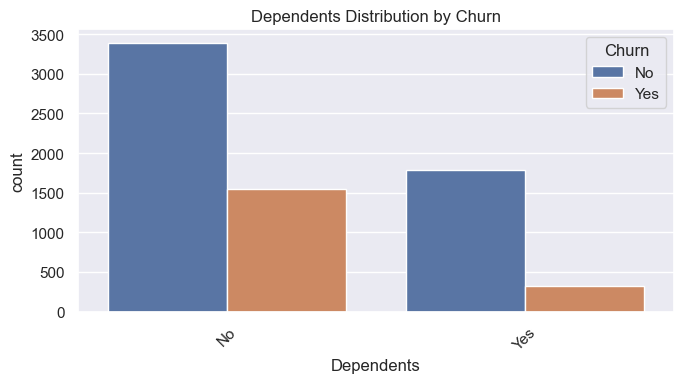

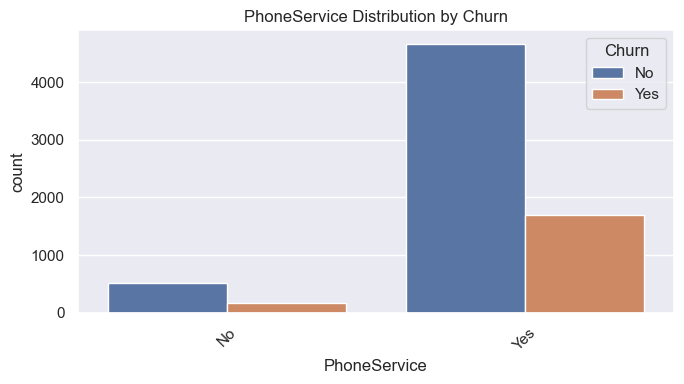

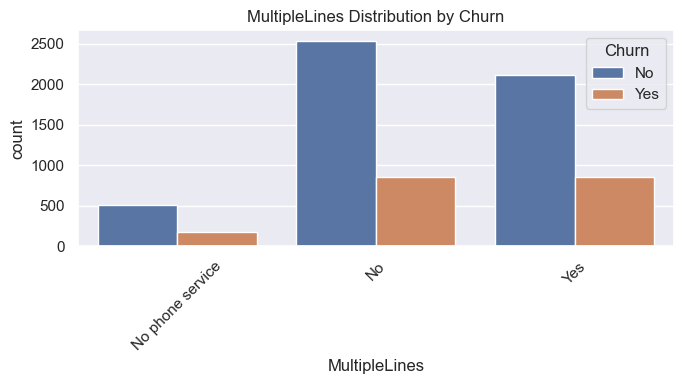

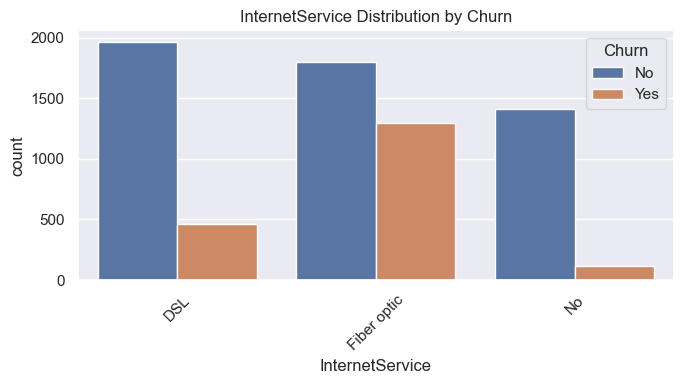

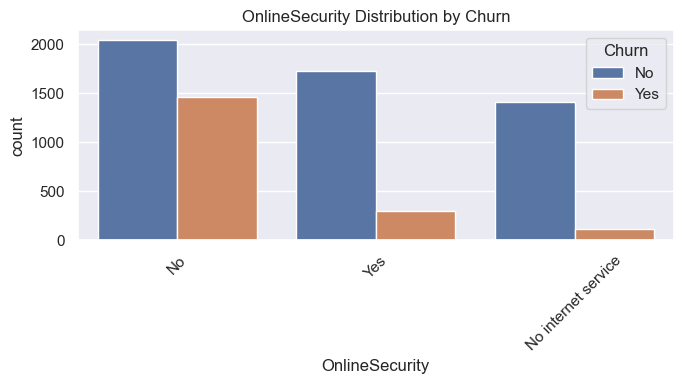

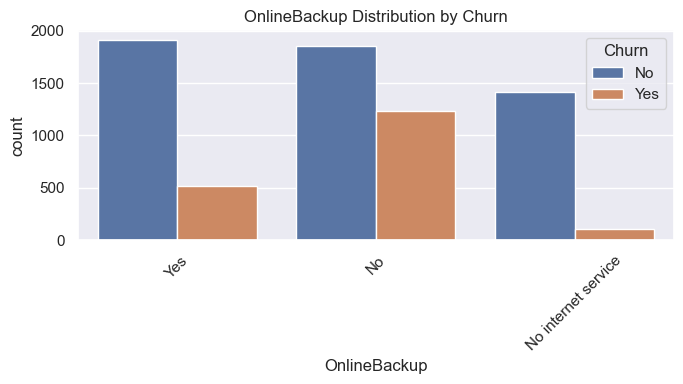

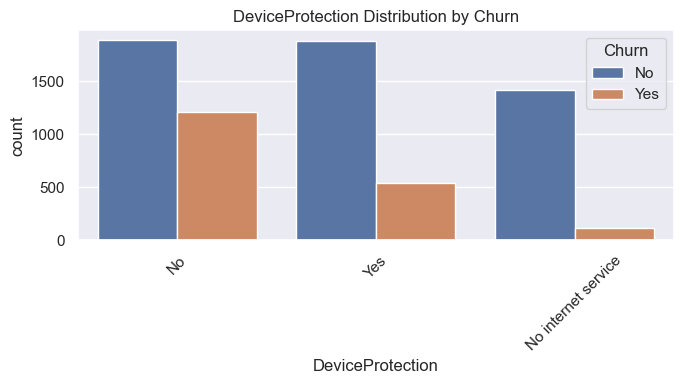

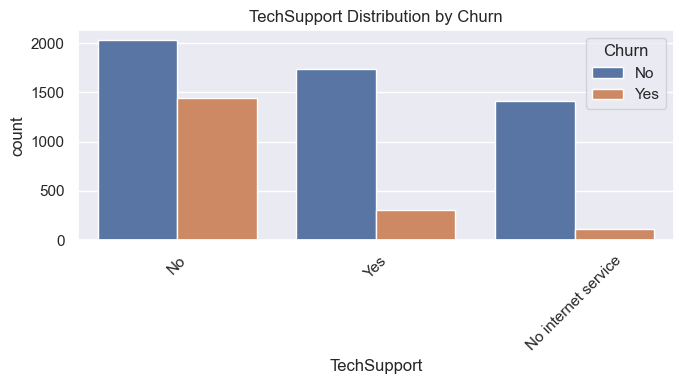

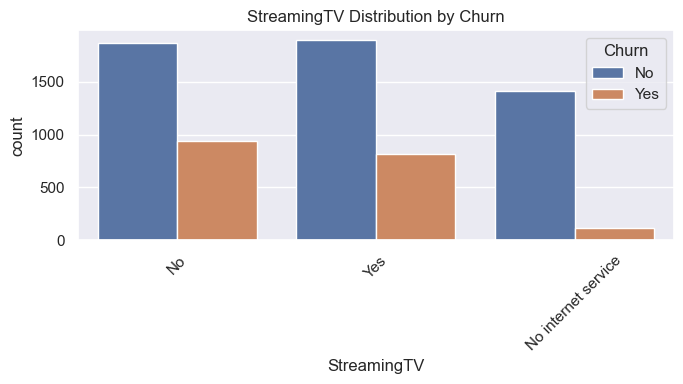

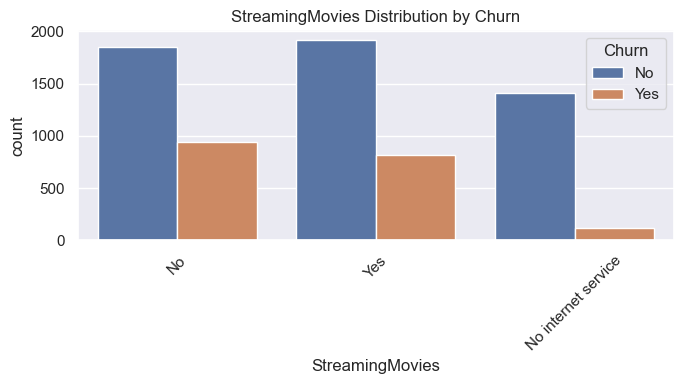

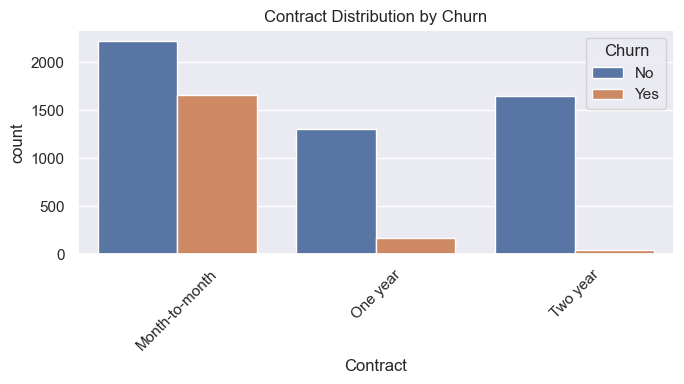

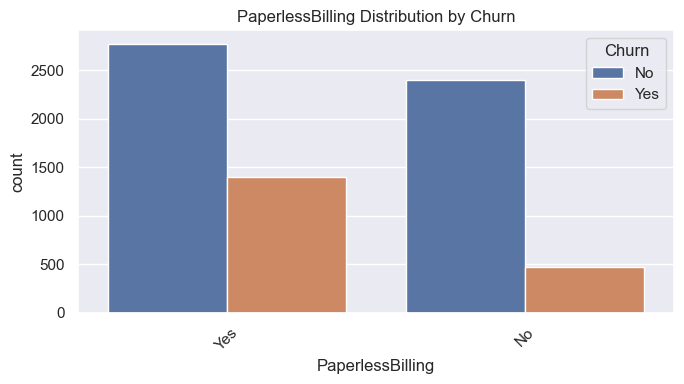

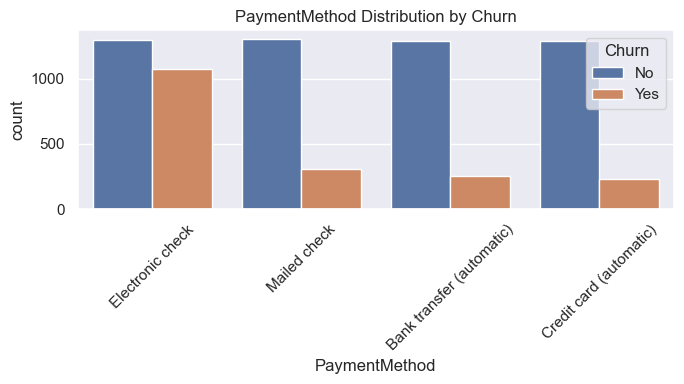

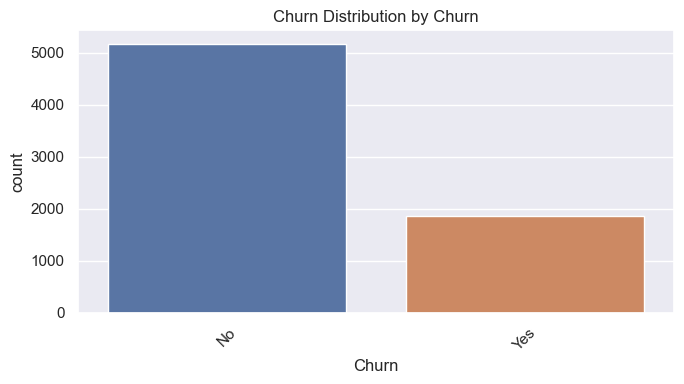

In [17]:
# Countplots for Categorical Features
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=eda, x=col, hue='Churn')
    plt.title(f"{col} Distribution by Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
# Churn Rate Per Category
for col in categorical_cols:
    print(f"Churn rate for {col}:")
    rate = (eda.groupby(col)['Churn']
            .value_counts(normalize=True)
            .rename("percentage") * 100)
    display(rate.round(2))
    print("\n")

Churn rate for gender:


gender  Churn
Female  No       73.08
        Yes      26.92
Male    No       73.84
        Yes      26.16
Name: percentage, dtype: float64



Churn rate for Partner:


Partner  Churn
No       No       67.04
         Yes      32.96
Yes      No       80.34
         Yes      19.66
Name: percentage, dtype: float64



Churn rate for Dependents:


Dependents  Churn
No          No       68.72
            Yes      31.28
Yes         No       84.55
            Yes      15.45
Name: percentage, dtype: float64



Churn rate for PhoneService:


PhoneService  Churn
No            No       75.07
              Yes      24.93
Yes           No       73.29
              Yes      26.71
Name: percentage, dtype: float64



Churn rate for MultipleLines:


MultipleLines     Churn
No                No       74.96
                  Yes      25.04
No phone service  No       75.07
                  Yes      24.93
Yes               No       71.39
                  Yes      28.61
Name: percentage, dtype: float64



Churn rate for InternetService:


InternetService  Churn
DSL              No       81.04
                 Yes      18.96
Fiber optic      No       58.11
                 Yes      41.89
No               No       92.60
                 Yes       7.40
Name: percentage, dtype: float64



Churn rate for OnlineSecurity:


OnlineSecurity       Churn
No                   No       58.23
                     Yes      41.77
No internet service  No       92.60
                     Yes       7.40
Yes                  No       85.39
                     Yes      14.61
Name: percentage, dtype: float64



Churn rate for OnlineBackup:


OnlineBackup         Churn
No                   No       60.07
                     Yes      39.93
No internet service  No       92.60
                     Yes       7.40
Yes                  No       78.47
                     Yes      21.53
Name: percentage, dtype: float64



Churn rate for DeviceProtection:


DeviceProtection     Churn
No                   No       60.87
                     Yes      39.13
No internet service  No       92.60
                     Yes       7.40
Yes                  No       77.50
                     Yes      22.50
Name: percentage, dtype: float64



Churn rate for TechSupport:


TechSupport          Churn
No                   No       58.36
                     Yes      41.64
No internet service  No       92.60
                     Yes       7.40
Yes                  No       84.83
                     Yes      15.17
Name: percentage, dtype: float64



Churn rate for StreamingTV:


StreamingTV          Churn
No                   No       66.48
                     Yes      33.52
No internet service  No       92.60
                     Yes       7.40
Yes                  No       69.93
                     Yes      30.07
Name: percentage, dtype: float64



Churn rate for StreamingMovies:


StreamingMovies      Churn
No                   No       66.32
                     Yes      33.68
No internet service  No       92.60
                     Yes       7.40
Yes                  No       70.06
                     Yes      29.94
Name: percentage, dtype: float64



Churn rate for Contract:


Contract        Churn
Month-to-month  No       57.29
                Yes      42.71
One year        No       88.73
                Yes      11.27
Two year        No       97.17
                Yes       2.83
Name: percentage, dtype: float64



Churn rate for PaperlessBilling:


PaperlessBilling  Churn
No                No       83.67
                  Yes      16.33
Yes               No       66.43
                  Yes      33.57
Name: percentage, dtype: float64



Churn rate for PaymentMethod:


PaymentMethod              Churn
Bank transfer (automatic)  No       83.29
                           Yes      16.71
Credit card (automatic)    No       84.76
                           Yes      15.24
Electronic check           No       54.71
                           Yes      45.29
Mailed check               No       80.89
                           Yes      19.11
Name: percentage, dtype: float64



Churn rate for Churn:


Churn
No     100.0
Yes    100.0
Name: percentage, dtype: float64

## Key Insights Extracted from the Analysis

**Target Balance**
- The dataset is imbalanced: Majority = No Churn (≈73%), Minority = Yes Churn (≈27%).

**Numeric Insights**
- **Tenure:** Customers with short tenure have a higher churn rate.
- **MonthlyCharges:** Higher monthly charges are associated with more churn.
- **TotalCharges:** Lower total charges correlate with churn (because low tenure).

**Categorical Insights**
- **Contract Type:** Month-to-month customers show the highest churn.
- **Payment Method:** Electronic check users are most likely to churn.
- **InternetService:** Fiber optic users churn more compared to DSL.
- **SeniorCitizen:** Seniors churn more than non-seniors.
- **TechSupport & OnlineSecurity:** Customers without these services churn more.

**General Pattern**
- Churn is highest among:
  - High monthly charge customers
  - Low tenure customers
  - Month-to-month contract customers
  - Users with electronic check payment
  - Customers lacking support services

### **Summary of Exploratory Data Analysis**
- The dataset was loaded and cleaned (missing TotalCharges handled).
- The target variable shows imbalance (73% No, 27% Yes).
- Numerical variables reveal that low-tenure and high-charge customers churn more.
- Categorical analysis shows that contract type, payment method, and support services strongly influence churn.
- Several clear behavioural patterns emerged that guide feature engineering and model selection.
- This EDA strongly supports the need for preprocessing steps such as:
  - One-hot encoding
  - Scaling numeric features
  - Handling imbalance via resampling or class weights